In [1]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 9
pd.options.display.max_columns = 10

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Framing

Reading the structure data in the CSV file:

In [2]:
df_poke = pd.read_csv("statsDF.csv")
df_poke

,Unnamed: 0,ID,Pokemon,Legendary,Stat Total,ATK Sum,DEF Sum,Height,Weight
0,0,1,bulbasaur,False,318,160,161,7,69
1,1,2,ivysaur,False,405,203,205,10,130
2,2,3,venusaur,False,525,263,265,20,1000
3,3,4,charmander,False,309,178,134,6,85
...,...,...,...,...,...,...,...,...,...
802,802,803,poipole,False,420,220,203,6,18
803,803,804,naganadel,False,540,322,221,36,1500
804,804,805,stakataka,False,570,198,375,55,8200
805,805,806,blacephalon,False,570,386,187,18,130


Dropping columns that are irrelevant to this section and splitting the dataframe into two dataframes for Legendary and NonLegendary Pokemon:

In [37]:
df_AD = df_poke.drop(columns = ["Unnamed: 0","Height","Weight","Stat Total"])
df_LegsEnd = df_AD[df_AD["Legendary"] == True]
df_LegsDontEnd = df_AD[df_AD["Legendary"] == False]
df_LegsEnd

,ID,Pokemon,Legendary,ATK Sum,DEF Sum
143,144,articuno,True,266,317
144,145,zapdos,True,316,267
145,146,moltres,True,316,267
149,150,mewtwo,True,395,288
...,...,...,...,...,...
791,792,lunala,True,348,335
799,800,necrozma,True,314,289
800,801,magearna,True,291,312
801,802,marshadow,True,341,262


# Visualizing Pokemon Distribution by Stats

Now that the data is organized distinctly, let's visualize the pokemon in histograms with their offensive stat totals on the x-axis and their defensive stat totals on the y-axis.

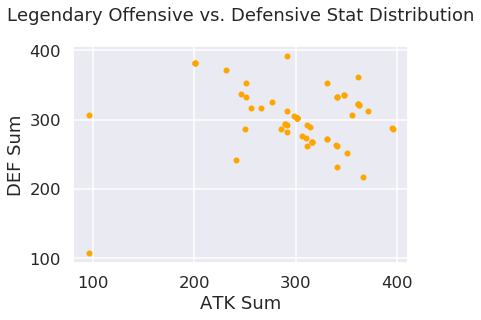

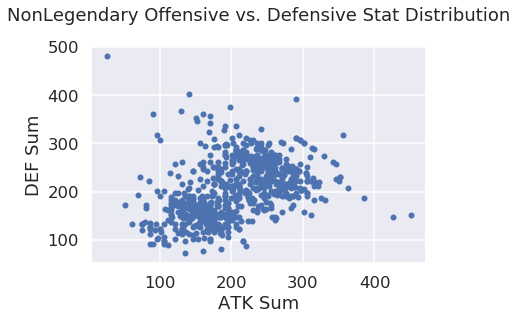

In [32]:
df_LegsEnd.plot.scatter(x="ATK Sum", y="DEF Sum", c="orange")
plt.title("Legendary Offensive vs. Defensive Stat Distribution", pad=(25))
df_LegsDontEnd.plot.scatter(x="ATK Sum", y="DEF Sum", c="b")
plt.title("NonLegendary Offensive vs. Defensive Stat Distribution", pad=(25))
plt.show()

In the two histograms above, we can observe the distribution of offensive and defensive stats on the Legendary and NonLegendary Pokemon separately. In the first histogram, we can already see that Legendary Pokemon tend to lean in the upper range for both offsensive and defensive stats, with the exception of a couple of outliers. In the second histogram, we can observe that the majority of the NonLegendary Pokemon cluster in a lower range than the Legendary Pokemon.

Now let's see how the two groups look in the same histogram:

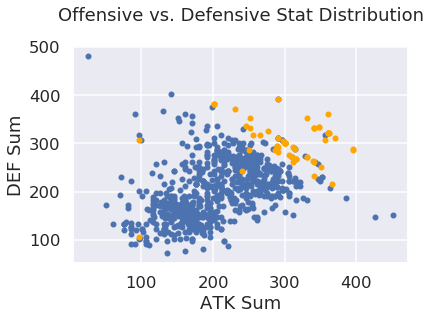

In [7]:
a = df_LegsDontEnd.plot.scatter(x="ATK Sum", y="DEF Sum", c="b")
b = df_LegsEnd.plot.scatter(x="ATK Sum", y="DEF Sum", c="orange", ax = a)
plt.title("Offensive vs. Defensive Stat Distribution", pad=(25))
plt.show()

After stacking the two histograms together we can 

In [8]:
df_total = df_poke.drop(columns = ["Unnamed: 0","Height","Weight","DEF Sum","ATK Sum"])
df_total

,ID,Pokemon,Legendary,Stat Total
0,1,bulbasaur,False,318
1,2,ivysaur,False,405
2,3,venusaur,False,525
3,4,charmander,False,309
...,...,...,...,...
802,803,poipole,False,420
803,804,naganadel,False,540
804,805,stakataka,False,570
805,806,blacephalon,False,570


In [9]:
df_legtotal = df_total[df_AD["Legendary"] == True]
df_legtotal

,ID,Pokemon,Legendary,Stat Total
143,144,articuno,True,580
144,145,zapdos,True,580
145,146,moltres,True,580
149,150,mewtwo,True,680
...,...,...,...,...
791,792,lunala,True,680
799,800,necrozma,True,600
800,801,magearna,True,600
801,802,marshadow,True,600


In [10]:
df_nontotal = df_total[df_AD["Legendary"] == False]
df_nontotal

,ID,Pokemon,Legendary,Stat Total
0,1,bulbasaur,False,318
1,2,ivysaur,False,405
2,3,venusaur,False,525
3,4,charmander,False,309
...,...,...,...,...
802,803,poipole,False,420
803,804,naganadel,False,540
804,805,stakataka,False,570
805,806,blacephalon,False,570


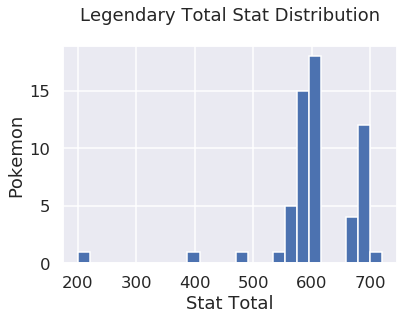

In [28]:
df_legtotal["Stat Total"].hist(bins = 25)
plt.xlabel("Stat Total")
plt.ylabel("Pokemon")
plt.title("Legendary Total Stat Distribution", pad=(25))
plt.show()

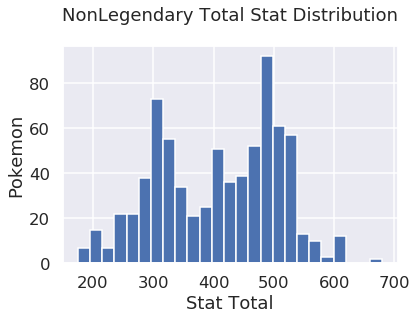

In [30]:
df_nontotal["Stat Total"].hist(bins = 25)
plt.xlabel("Stat Total")
plt.ylabel("Pokemon")
plt.title("NonLegendary Total Stat Distribution", pad=(25))
plt.show()

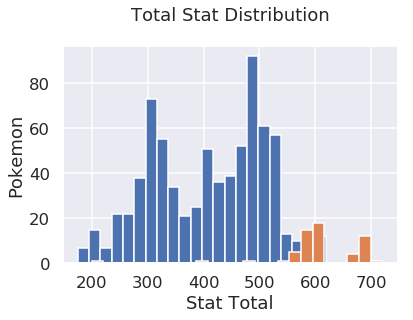

In [13]:
a1 = df_nontotal["Stat Total"].hist(bins = 25)
b1 = df_legtotal["Stat Total"].hist(bins = 25, ax = a1)
plt.title("Total Stat Distribution", pad=(25))
plt.xlabel("Stat Total")
plt.ylabel("Pokemon")
plt.show()

In [14]:
numNon = len(df_nontotal["Stat Total"])
numLeg = len(df_legtotal["Stat Total"])
print(numNon)
print(numLeg)

747
59


In [25]:
sumNon = df_nontotal.sum(axis = 0)[3]
sumLeg = df_legtotal.sum(axis = 0)[3]
avgNon = sumNon / numNon
avgLeg = sumLeg / numLeg
print(avgNon)
print(avgLeg)

407.43373493975906
601.9322033898305


In [26]:
sumNonA = df_LegsDontEnd.sum(axis = 0)[3]
sumNonD = df_LegsDontEnd.sum(axis = 0)[4]
sumLegA = df_LegsEnd.sum(axis = 0)[3]
sumLegD = df_LegsEnd.sum(axis = 0)[4]
avgNonA = sumNonA / numNon
avgNonD = sumNonD / numNon
avgLegA = sumLegA / numLeg
avgLegD = sumLegD / numLeg

print(avgNonA)
print(avgNonD)
print(avgLegA)
print(avgLegD)

205.11244979919678
205.32128514056225
302.2542372881356
302.6779661016949


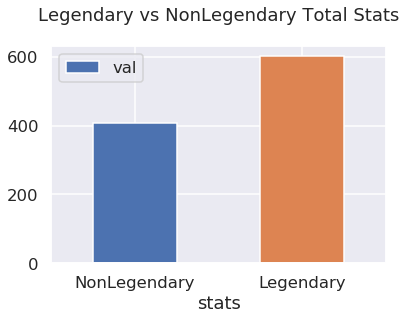

In [31]:
df = pd.DataFrame({'stats':['NonLegendary', 'Legendary'], 'val':[avgNon, avgLeg]})
ax = df.plot.bar(x='stats', y='val', rot=0)
plt.title("Legendary vs NonLegendary Total Stats", pad=(25))
plt.show()

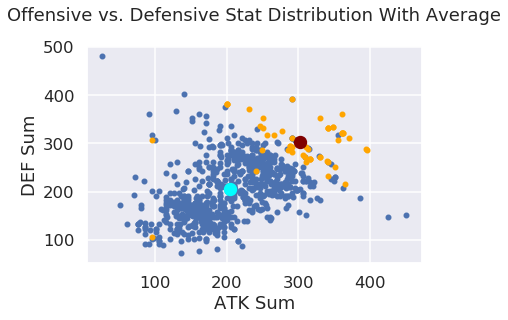

In [27]:
df_avgLeg = pd.DataFrame({"ID":["999"], "Pokemon":["Average Legendary"], "Legendary":["True"], "ATK Sum":[avgLegA], "DEF Sum":[avgLegD]})
df_avgNon = pd.DataFrame({"ID":["999"], "Pokemon":["Average NonLegendary"], "Legendary":["False"], "ATK Sum":[avgNonA], "DEF Sum":[avgNonD]})

aaa = df_LegsDontEnd.plot.scatter(x="ATK Sum", y="DEF Sum", c="b")
bbb = df_LegsEnd.plot.scatter(x="ATK Sum", y="DEF Sum", c="orange", ax = aaa)
ccc = df_avgNon.plot.scatter(x="ATK Sum", y="DEF Sum", c="cyan", s=140, ax = aaa)
ddd = df_avgLeg.plot.scatter(x="ATK Sum", y="DEF Sum", c="maroon", s=140, ax = aaa)
plt.title("Offensive vs. Defensive Stat Distribution With Average", pad=(25))
plt.show()